2151131 朱沙桐

要证明一个两层的ReLU（Rectified Linear Unit，线性整流单元）网络可以模拟任何函数，我们可以参考逼近理论和通用逼近定理（Universal Approximation Theorem）。

通用逼近定理提供了神经网络强大的理论基础，证明了在一定条件下，即使只有一个隐藏层的神经网络也可以逼近任何连续函数，只要网络有足够多的神经元。

对于ReLU激活函数的网络，我们可以通过以下步骤简化理解这一定理：

## ReLU函数的表达能力

ReLU函数可以通过其线性组合来表达很多不同的函数形式。具体来说，通过对多个ReLU函数进行加权和操作，我们可以构造出折线形状的函数。这是因为ReLU函数本身就是一个分段线性函数。通过足够多的分段（即足够多的ReLU神经元），我们可以使这个折线图足够接近任何连续的目标函数。基本上，随着ReLU单元数量的增加，这些折线可以逼近任何连续函数的形状。

## 通用逼近定理的关键

尽管通用逼近定理并不限制使用特定的激活函数，但对于包含至少一个隐藏层的前馈神经网络，如果隐藏层内有足够多的神经元，这个网络可以逼近任何连续函数。这一理论也适用于使用ReLU激活函数的网络。

## 构建逼近函数

通过调整连接到隐藏层神经元的权重和偏置，可以改变ReLU激活后的输出，从而形成不同的线段。这些线段可以被精细地调整来逼近目标函数的不同部分。
最后，隐藏层的输出可以被进一步组合（通过输出层的权重和偏置），形成最终逼近目标函数的输出。
即使是一个只有两层的ReLU网络（一个输入层、一个隐藏层和一个输出层），只要隐藏层包含足够多的神经元，理论上也可以逼近任何连续函数。

In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 定义一个简单的两层神经网络结构
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out

In [16]:
# 训练函数
def train_network(func, network, epochs=5000, learning_rate=0.01):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)

    # 生成数据
    x_train = torch.linspace(-10, 10, 100).view(-1, 1)
    y_train = func(x_train)

    # 训练网络
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = network(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    return x_train, y_train, network

我们可以定义几个不同的函数，并使用基于ReLU激活函数的两层神经网络来拟合它们。这里，我会选择以下三个函数进行演示：

线性函数：f(x)=2x+3

二次函数：f(x)=x^2−4x+2

正弦函数：f(x)=sin(x)

为了拟合这些函数，我们将使用Python和PyTorch框架来构建和训练神经网络。每个函数都将独立地使用一个两层的ReLU网络进行拟合。

In [17]:
# 定义函数
def linear_func(x):
    return 2 * x + 3


def quadratic_func(x):
    return x ** 2 - 4 * x + 2


def sine_func(x):
    return np.sin(x)

In [18]:
# 训练网络
functions = [linear_func, quadratic_func, sine_func]
results = []

for func in functions:
    network = SimpleNN(1, 50, 1)
    x_train, y_train, trained_network = train_network(func, network)
    y_pred = trained_network(x_train)
    results.append((x_train, y_train, y_pred))

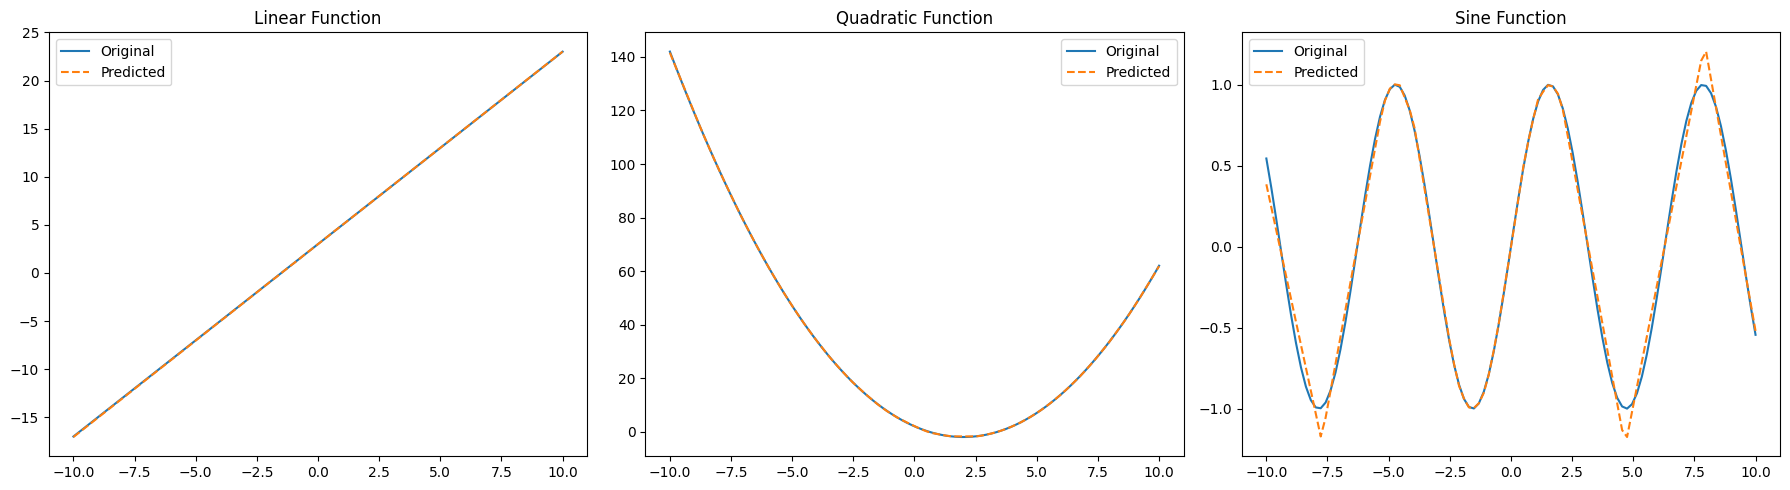

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Linear Function', 'Quadratic Function', 'Sine Function']

for i, (x_train, y_train, y_pred) in enumerate(results):
    axs[i].plot(x_train.data.numpy(), y_train.data.numpy(), label='Original')
    axs[i].plot(x_train.data.numpy(), y_pred.data.numpy(),
                label='Predicted', linestyle='--')
    axs[i].set_title(titles[i])
    axs[i].legend()

plt.tight_layout()
plt.show()

这些结果展示了使用具有ReLU激活函数的两层神经网络对不同类型的函数进行拟合的能力，从而验证了理论的正确性。